In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [158]:
nb = 1000
x = np.random.normal(0, 1, size=nb)
y = 2*x + np.random.normal(0, 0.5, size=nb)

In [159]:
k = 2
p = 2
C = np.random.normal(0, 1, size=(p, k))
X = np.random.normal(0, 1, size=(k, nb))
Y = np.concatenate((x[:, None], y[:, None]), axis=1).T

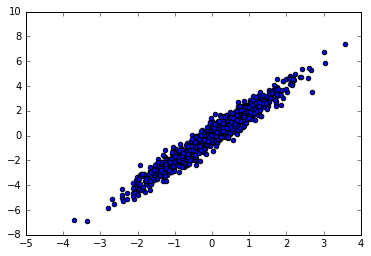

In [160]:
plt.scatter(Y[0, :], Y[1, :])

In [161]:
from scipy.linalg import orth

C = np.random.normal(0, 0.1, size=(p, k))
X = np.random.normal(0, 0.1, size=(k, nb))

for i in range(10):
    print(  ((np.dot(C.T, X) - Y)**2).sum()) 
    """
    plt.scatter(Y[0, :], Y[1, :])
    
    x1, y1 = 0, 0
    x2, y2 = 2 * C[:, 0]

    plt.plot([x1, x2], [y1, y2], color='r', linestyle='-', linewidth=2)
    x1, y1 = 0, 0
    x2, y2 = 2 * C[:, 1]

    plt.plot([x1, x2], [y1, y2], color='g', linestyle='-', linewidth=2)
    plt.axes().set_aspect('equal')
    plt.show()
    """
    X = np.dot(np.linalg.inv(np.dot(C.T, C)), np.dot(C.T, Y))
    C = np.dot(np.dot(Y, X.T), np.linalg.inv(np.dot(X, X.T)))
    C = np.dot(np.dot(Y, X.T), np.linalg.inv(np.dot(X, X.T)))

5388.46923009
536.405819795
536.405819795
536.405819795
536.405819795
536.405819795
536.405819795
536.405819795
536.405819795
536.405819795


In [162]:
#C = orth(C)
X = np.dot(C.T, Y)
print(X.shape)
print(C)

(2, 1000)
[[ 0.00775615 -0.1885741 ]
 [-0.13342732 -0.08737487]]


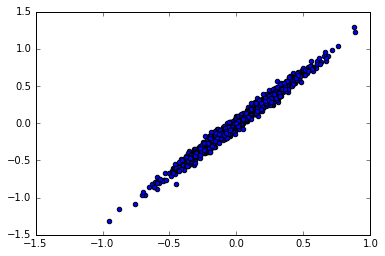

In [163]:
plt.scatter(X[0, :], X[1, :])

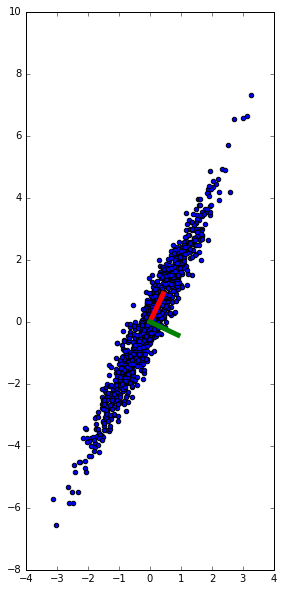

In [36]:
from sklearn.decomposition import PCA
pca=PCA().fit(Y.T)
comp = pca.components_

#fig, ax = plt.subplots()
fig = plt.figure(figsize=(10, 10))

x1, y1 =  0, 0 #-2 * comp[0, :]
x2, y2 = comp[0, :] 
plt.plot([x1, x2], [y1, y2], color='r', linestyle='-', linewidth=5)

x1, y1 = 0, 0#-2 * comp[1, :]
x2, y2 =  comp[1, :]
plt.plot([x1, x2], [y1, y2], color='g', linestyle='-', linewidth=5)
plt.scatter(Y[0, :], Y[1, :])
plt.axes().set_aspect('equal')


"""
for axis in comp:
    sigma = 500
    start, end = mu-mu, mu-mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
"""
plt.show()

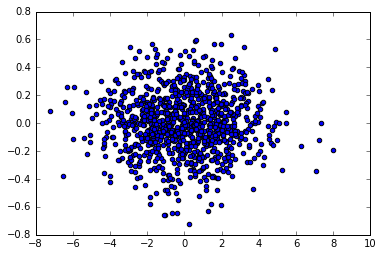

In [38]:
x = np.dot(comp, Y)
plt.scatter(x[0, :], x[1, :])

In [80]:
X = np.dot(np.linalg.inv(np.dot(comp.T, comp)), np.dot(comp.T, Y))
print(  ((np.dot(comp.T, X) - Y)**2).sum()) 

1.00140506604e-28
